# **KMeans: Find K (Core)**

Name: Kellianne Yang

# Task

Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt to income ratio to group them into segments.

You can download the data here: https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv

The original data is from this data source: https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means

1. Use KMeans to create various customer segments.
  1. Use an Elbow Plot of inertia.
  2. And a plot of Silhouette Scores.
  3. Choose a K based on the results.
2. Submit your notebook below.


# Preliminary Steps

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# load data
path = '/content/drive/MyDrive/Coding Dojo/Stack 3: Advanced Machine Learning (Weeks 9-12)/Week 9: Unsupervised Learning: Clustering/cust_seg.csv'
df = pd.read_csv(path, index_col = 0)

In [ ]:
# inspect
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


In [ ]:
# inspect
df.sample(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
2,3,33,2,10,57,6.111,5.802,1.0,20.9
145,146,28,3,2,30,1.522,4.448,0.0,19.9
833,834,30,4,7,30,0.264,4.446,0.0,15.7
272,273,35,1,11,40,0.572,0.588,NaN,2.9
823,824,27,4,0,25,1.419,1.756,1.0,12.7
147,148,46,3,3,43,3.042,2.634,1.0,13.2
340,341,39,3,11,39,2.561,2.470,0.0,12.9
165,166,36,4,8,32,0.025,0.487,0.0,1.6
377,378,35,1,18,42,0.205,2.903,0.0,7.4
80,81,33,1,12,68,1.366,5.978,0.0,10.8


In [ ]:
# delete column(s) that should not factor into clusters
df.drop(columns = 'Customer Id', inplace = True)

# check
df.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [ ]:
# check for impossible numeric values
df.describe(include = 'number')

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


I would like to know more about the unites that 'Card Debt', 'Other Debt', and 'Income' are in, but they will be scaled anyway. 

In [ ]:
# check for duplicates
df.duplicated().sum()

0

In [ ]:
# check for missing values
df.isna().sum()

# will impute values in 'Defaulted' column

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [ ]:
# preprocess 'Defaulted' column

# instantiate scaler
scaler = StandardScaler()

# instantiate imputer
most_freq_imputer = SimpleImputer(strategy = 'most_frequent', 
                                  add_indicator = True)

# make pipeline
defaulted_pipe = make_pipeline(most_freq_imputer, scaler)

# make tuple
defaulted_tuple = (defaulted_pipe, ['Defaulted'])

In [ ]:
# preprocess rest of df

other_cols_df = df.drop(columns = 'Defaulted')
other_cols_list = list(other_cols_df.columns)

# instantiate scaler
scaler = StandardScaler()

# make tuple
other_cols_tuple = (scaler, other_cols_list)

In [ ]:
# make preprocessor
preprocessor = make_column_transformer(defaulted_tuple, 
                                       other_cols_tuple, 
                                       remainder = 'drop')

In [ ]:
# fit and transform
preprocessed_df = preprocessor.fit_transform(df)

# Elbow plot of inertia

Text(0, 0.5, 'inertia')

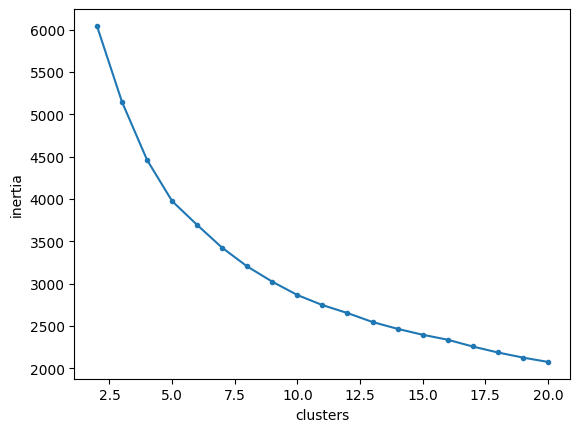

In [ ]:
# create list for inertias
inertias = []

# loop through k values 2-20 and store inertias in list
for k in range(2, 21):
  kmeans = KMeans(n_clusters = k, n_init = 10, random_stqte = 42)
  kmeans.fit(preprocessed_df)
  inertias.append(kmeans.inertia_)

# visualize elbow plot of inertias
plt.plot(range(2,21), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

In [ ]:
# difficult to discern elbow in plot; compute numerically
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from kneed import KneeLocator

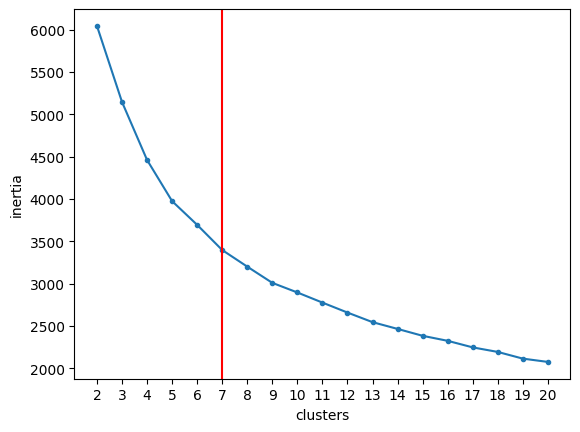

Knee point: 7


In [ ]:
# decreasing convex function

# find the knee point using the KneeLocator function
knee_locator = KneeLocator(range(2, 21), 
                           inertias, 
                           curve = 'convex', 
                           direction = 'decreasing',
                           interp_method = 'polynomial')
knee = knee_locator.knee

# plot the data and knee point
plt.plot(range(2, 21), inertias, marker = '.')
plt.axvline(x = knee, color = 'red')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.xticks(range(2, 21))
plt.show()

print('Knee point:', knee)

# Plot of silhouette scores

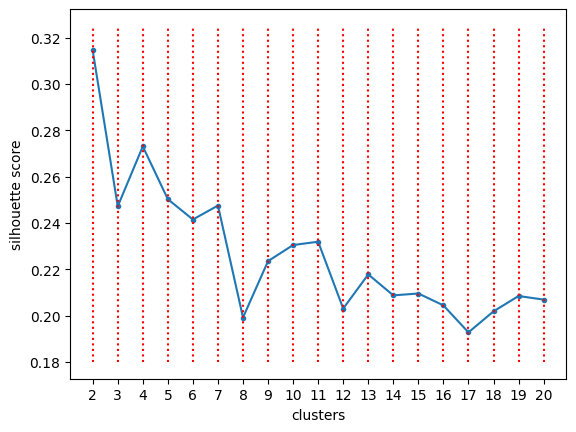

In [ ]:
# create list for silhouette scores
silhouette_scores = []

for k in range(2, 21):
  kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
  kmeans.fit(preprocessed_df)
  silhouette_scores.append(silhouette_score(preprocessed_df, kmeans.labels_))

# visualize silhouette_scores
plt.plot(range(2, 21), 
         silhouette_scores, 
         marker = '.')
plt.xlabel('clusters')
plt.ylabel('silhouette score')
plt.xticks(range(2, 21))
plt.vlines(range(2, 21), 
           ymin = .18, 
           ymax = .325, 
           color = 'red', 
           linestyle = 'dotted')
plt.show();

In [ ]:
# determine how many clusters produces the highest silhouette score in a table
silhouette_df = pd.DataFrame()

silhouette_df['silhouette_score'] = silhouette_scores
silhouette_df['clusters'] = range(2, 21)

silhouette_df.sort_values(by = 'silhouette_score', ascending = False).head()

,silhouette_score,clusters
0,0.314431,2
2,0.272996,4
3,0.250224,5
5,0.247479,7
1,0.247152,3


# K decision

The two plots, an elbow plot and a silhouette score plot, indicate different numbers of clusters to use for this data. The elbow plot indicates 7 clusters, although the elbow plot does not show a very distinct elbow. The silhouette scores indicate that 2 clusters should be used. 